## Deep Learning models from scrath

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def dL_du2(L, y, u2, z2, fun = 'cross_entropy'):
    
    if fun == 'cross_entropy':
        return z2-y
    
    elif fun == 'mse':
        return z2*(1-z2)*(z2-y)
    
def du2_dz1(A2):
    g = A2
    return g[None, :]

def du2_dA2(u2, z1, A2):
    
    # make Jacobian tensor with all 0s    
    g = np.zeros((1,) + A2.shape)
    g[0] = z1
    return g

def du2_db2(u2, b2):
    
    return 1    

def dz1_du1(z1, u1, fun = 'relu'):
    
    g = np.zeros(z1.shape + u1.shape) 
    
    if fun == 'relu':
        np.fill_diagonal(g, np.where(u1>0, 1, 0))
        
    elif fun=='tanh':
        np.fill_diagonal(g, 1-z1*z1)
    
    return g

def du1_dA1(u1, x, A1):
    
    # make Jacobian tensor with all 0s
    g = np.zeros(u1.shape + A1.shape)
    
    # set the gradient values
    for i, _ in enumerate(u1):
        g[i,i] = x
        
    return g

def du1_db1(u1, b1):
    g = np.eye(u1.shape[0])   
    return g

In [ ]:
def forward(A1, A2, b1, b2, x, y, act_fun = 'relu', loss_fun = 'cross_entropy'):
    
    u1 = x.dot(A1.T) + b1  # x: N x 2 , A1: 3X2
    
    if act_fun == 'relu':
        z1 = np.where(u1>0, u1, 0)  # N x 3
        
    elif act_fun == 'tanh':
        z1 = np.tanh(u1)
        
    u2 = z1.dot(A2.T) + b2   # z1: N x 3 , A2: 3
    
    z2 = 1/(1+np.exp(-u2))
    
    if loss_fun == 'cross_entropy':
        loss = np.mean(- y*np.log(z2) - (1-y)*np.log(1-z2))
        
    elif loss_fun == 'mse':
        loss = 0.5*np.mean(np.square(y-z2))
                   
    return u1, z1, u2, z2, loss              

In [ ]:
def backpropagate(L, x, y, u1, u2, z1, z2, \
                  A1, A2, b1, b2, \
                  act_fun = 'relu', \
                  loss_fun = 'cross_entropy'):
    
    
    d_u2 = dL_du2(L, y, u2, z2, loss_fun)
    d_z1 = du2_dz1(A2)
    d_a2 = du2_dA2(u2, z1, A2)   
    d_b2 = du2_db2(u2, b2)

    d_u1 = dz1_du1(z1, u1, act_fun)
    d_a1 = du1_dA1(u1, x, A1)
    d_b1 = du1_db1(u1, b1)

    g_A2 = d_u2 * d_a2
    g_b2 = d_u2 * d_b2

    g_A1 = d_u2 * d_z1.dot(d_u1).dot(d_a1)
    g_b1 = d_u2 * d_z1.dot(d_u1).dot(d_b1)
    
    return g_A1, g_b1, g_A2, g_b2

In [ ]:
def gradient_desc(v, g, lam):
    return v-lam*g

In [ ]:
def train(x, y, A1, A2, b1, b2, \
          lam = 0.001, act_fun = 'relu', \
          loss_fun = 'cross_entropy', \
          epoch = 100):
    
    loss_hist = []  
    pred_hist = []

    for i in range(epoch):
    
        u1, z1, u2, z2, loss = forward(A1, A2, b1, b2, x, y, act_fun , loss_fun )
        
        loss_hist.append(loss)
        pred_hist.append(z2)
            
        g_A1, g_b1, g_A2, g_b2 = backpropagate(loss, x, y, u1, u2, z1, z2, A1, A2, b1, b2, act_fun, loss_fun)
        
        A1 = gradient_desc(A1, g_A1.squeeze(), lam)
        b1 = gradient_desc(b1, g_b1.squeeze(), lam)
        A2 = gradient_desc(A2, g_A2.squeeze(), lam)
        b2 = gradient_desc(b2, g_b2, lam)
       
        #print("gradients: \n", G_A1, G_A1.shape, "\n\n",G_b1,G_b1.shape, "\n\n", G_A2,G_A2.shape, "\n\n",G_b2)
        #print("parameters: \n",A1, A1.shape, "\n\n", b1, b1.shape, "\n\n", A2, A2.shape, "\n\n",b2)
        #print("metrics: \n",acc_hist, loss_hist)
              
    return A1, b1, A2, b2, loss_hist, pred_hist

6. (0.5 point) Test your your `forward` and `backpropagate` functions as follows:
    - Initial parameter values and the training sample are set as follows: 
        - `A1 = [[-2,1],[2, -2],[-1, 5]], b1 = [3, -1, 2]`
        - `A2 = [1, -2, 2], b2 = 0`
        - `x = [0.465, 0.178], y = 0`
   
    - Call your `forward` and `backpropagate` functions under two cases:
        1. `act_fun = 'relu', loss_fun = 'cross_entropy'`
        1. `act_fun = 'tanh', loss_fun = 'mse'`
        
    - Carefully check the obtained `u1, z1, u2, z2, L` and the values of gradients $\frac{\partial{L}}{\partial{A^{(1)}}}, \frac{\partial{L}}{\partial{A^{(2)}}}, \frac{\partial{L}}{\partial{b^{(1)}}}, \frac{\partial{L}}{\partial{b^{(2)}}}$ to make sure they are correct.

In [ ]:
A1 = np.array([[-2,1],[2, -2],[-1, 5]])
A2 = np.array([1, -2, 2])
b1 = np.array([3, -1, 2])
b2 = 0
x = np.array([0.465, 0.178])
y = 0

In [ ]:
act_fun = 'relu'
loss_fun = 'cross_entropy'
u1, z1, u2, z2, L = forward(A1, A2, b1, b2, x, y, act_fun , loss_fun )

print("\nu1 :\n", u1)
print("\nz1 :\n", z1)
print("\nu2 :\n", u2)
print("\nz2 :\n", z2)
print("\nloss :\n", L)


g_A1, g_b1, g_A2, g_b2 = backpropagate(L, x, y, u1, u2, z1, z2, A1, A2, b1, b2, act_fun, loss_fun)

print("\ngradient g_A1:\n", g_A1)
print("\ngradient g_b1 :\n", g_b1)
print("\ngradient g_A2 :\n", g_A2)
print("\ngradient g_b2 :\n", g_b2)



u1 :
 [ 2.248 -0.426  2.425]

z1 :
 [2.248 0.    2.425]

u2 :
 7.098

z2 :
 0.9991739261777141

loss :
 7.0988264152093095

gradient g_A1:
 [[[0.46461588 0.17785296]
  [0.         0.        ]
  [0.92923175 0.35570592]]]

gradient g_b1 :
 [[0.99917393 0.         1.99834785]]

gradient g_A2 :
 [[2.24614299 0.         2.42299677]]

gradient g_b2 :
 0.9991739261777141


In [ ]:
act_fun = 'tanh'
loss_fun = 'mse'

u1, z1, u2, z2, L = forward(A1, A2, b1, b2, x, y, act_fun , loss_fun )

print("\nu1 :\n", u1)
print("\nz1 :\n", z1)
print("\nu2 :\n", u2)
print("\nz2 :\n", z2)
print("\nloss :\n", L)


g_A1, g_b1, g_A2, g_b2 = backpropagate(L, x, y, u1, u2, z1, z2, A1, A2, b1, b2, act_fun, loss_fun)

print("\ngradient g_A1:\n", g_A1)
print("\ngradient g_b1 :\n", g_b1)
print("\ngradient g_A2 :\n", g_A2)
print("\ngradient g_b2 :\n", g_b2)


u1 :
 [ 2.248 -0.426  2.425]

z1 :
 [ 0.97793901 -0.40197304  0.98446486]

u2 :
 3.7508148133339616

z2 :
 0.9770409150607987

loss :
 0.4773044748514214

gradient g_A1:
 [[[ 0.0004447   0.00017023]
  [-0.01708927 -0.0065417 ]
  [ 0.00062838  0.00024054]]]

gradient g_b1 :
 [[ 0.00095635 -0.03675111  0.00135135]]

gradient g_A2 :
 [[ 0.02143344 -0.00881002  0.02157647]]

gradient g_b2 :
 0.0219169479599493


7. (1 point) Put everything together: with the same initial parameter values and training instance as in Q6, train your model for 300 epochs with a learning rate of 0.01 under 4 cases:
    1. $f$ = `relu` and $g$ = `cross_entropy`
    1. $f$ = `relu` and $g$ = `mse`
    1. $f$ = `tanh` and $g$ = `cross_entropy`
    1. $f$ = `tanh` and $g$ = `mse`


Plot the loss and $z^{(2)}$ obtained in each epoch as a line chart. An example is shown below.

In [ ]:
A1 = np.array([[-2,1],[2, -2],[-1, 5]])
A2 = np.array([1, -2, 2])
b1 = np.array([3, -1, 2])
b2 = 0
x = np.array([0.465, 0.178])
y = 0

act_fun = 'relu'
loss_fun = 'cross_entropy'
epoch = 300
lam = 0.01

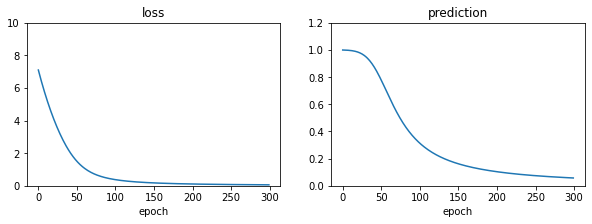

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

_, _, _, _, loss_hist, pred_hist = train(x, y, A1, A2, b1, b2, lam, act_fun, loss_fun, epoch)

f = plt.figure(figsize=(10,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(range(len(loss_hist)), loss_hist, "-", label ='loss') 
ax1.set_title("loss")
ax1.set_ylim((0, 10))
ax1.set_xlabel('epoch')

ax2.plot(range(len(pred_hist)), pred_hist, "-", label ="pred")
ax2.set_title("prediction")
ax2.set_ylim((0, 1.2))
ax2.set_xlabel('epoch')

plt.show()

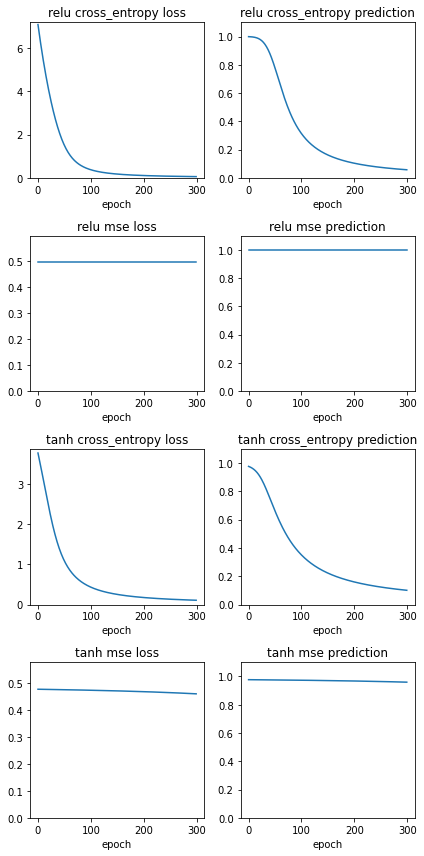

In [ ]:
act_funs = ['relu','tanh']
loss_funs = ['cross_entropy','mse']
epoch = 300
lam = 0.01

f = plt.figure(figsize=(6,12))
cnt = 1

for act_fun in act_funs:
    for loss_fun in loss_funs:
        _, _, _, _, loss_hist, pred_hist = train(x, y, A1, A2, b1, b2, lam, act_fun, loss_fun, epoch)
        
        ax1 = f.add_subplot(4,2,cnt)        
        ax2 = f.add_subplot(4,2,cnt+1)
        
        cnt +=2

        ax1.plot(range(len(loss_hist)), loss_hist, "-", label ='loss') ;
        ax1.set_title(act_fun + " " + loss_fun + " loss");
        ax1.set_ylim((0, max(loss_hist)+0.1));
        ax1.set_xlabel('epoch');

        ax2.plot(range(len(pred_hist)), pred_hist, "-", label ="pred");
        ax2.set_title(act_fun + " " + loss_fun + " prediction");
        ax2.set_ylim((0, 1.1));
        ax2.set_xlabel('epoch');

plt.tight_layout()

plt.show()